In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install folium


In [20]:
# Vizualizing NaN values
import missingno as msno
#Geolocalisation
import folium

In [6]:
df = pd.read_csv(r'C:\Users\Admin\Downloads/supermarket_sales - Sheet1.csv')

print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

# After Downloading the dataset, we read it using pandas

In [7]:
df.head(10).style.background_gradient(cmap='GnBu')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,01-05-2019,13:08,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,03-08-2019,10:29,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7,16.215500,340.525500,03-03-2019,13:23,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8,23.288000,489.048000,27-01-2019,20:33,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7,30.208500,634.378500,02-08-2019,10:37,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7,29.886500,627.616500,25-03-2019,18:30,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,25-02-2019,14:36,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,24-02-2019,11:38,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,01-10-2019,17:15,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,20-02-2019,13:27,Credit card,164.520000,4.761905,8.226000,5.900000


# After reading the data, we preprocess the data.
# Data Preprocessing
# We found out how many rows and columns and if there is any missing values

In [8]:
shape=df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 1000 rows and 17 columns


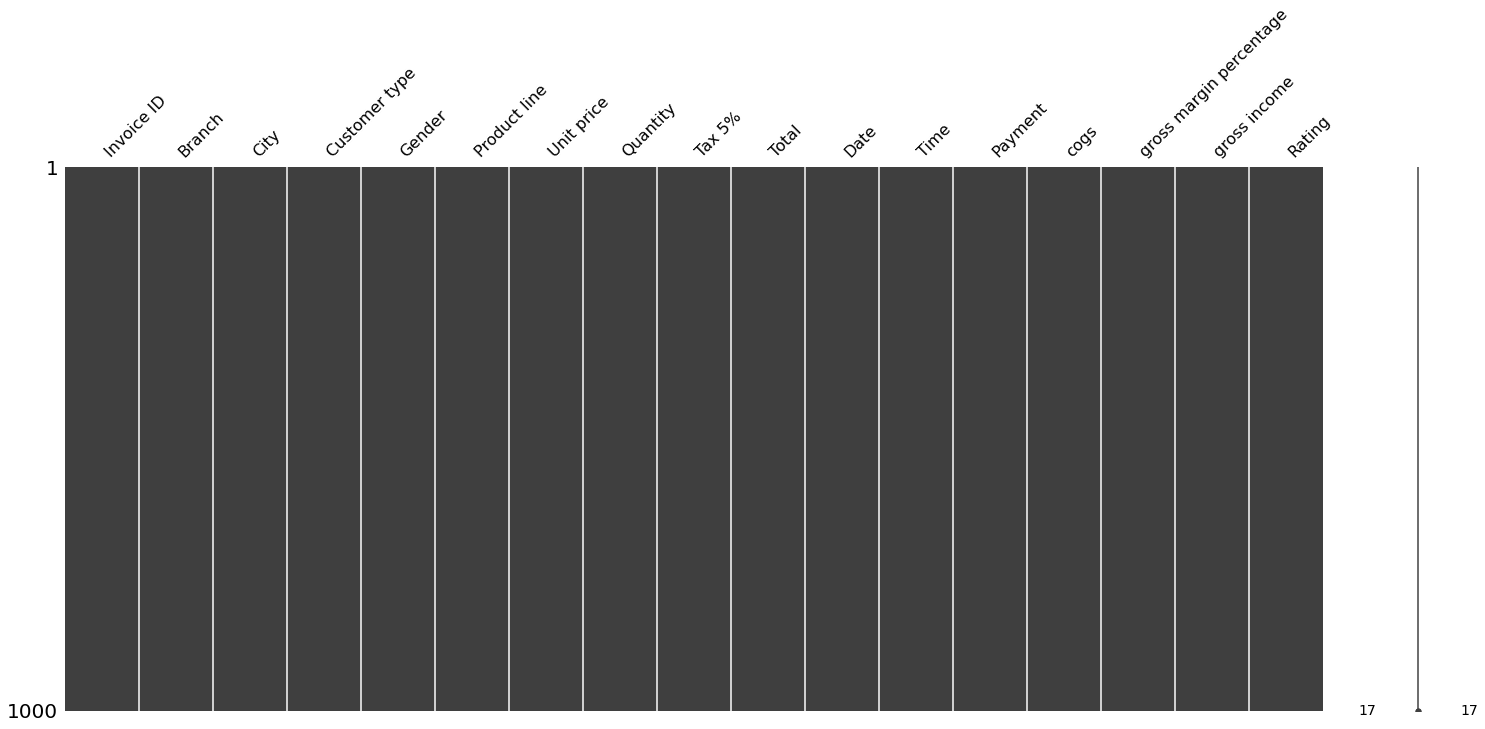

In [14]:
#Visualize the nan values in each columns
msno.matrix(df);

# We do not have any missing values.
# We also perform additional steps like parsing dates and creating additional columns.

In [11]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
# modified_df=df.copy()

# Convert date columns into date time 
df.Date = pd.to_datetime(df.Date)
#Add a month,day and weekday columns
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df['weekday']=df.Date.dt.day_name()
#Add a hour and minute columns 
df['hour']=df.Time.str[0:2]
df['minute']=df.Time.str[3:5]
#Make it int values
df['hour']=pd.to_numeric(df['hour'])
df['minute']=pd.to_numeric(df['minute'])


# Finding insight
City

In [21]:
cities = pd.DataFrame({'city': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.8409,19.7633,21.9588],
                       'Longitude' : [96.1735, 96.0785, 96.0891]})

market_map = folium.Map(location = [21.9162,95.9560], zoom_start = 5, tiles = 'CartoDB Positron', control_scale = True)

plt.figure(figsize=(800,600));

for (i, j) in cities.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['city'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(market_map)

market_map

<Figure size 57600x43200 with 0 Axes>

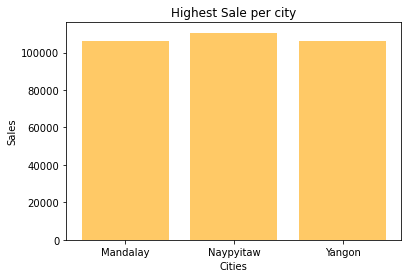

In [22]:
#Parameter for plotting 
sale=df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, df in df.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='orange',alpha=.6)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

# Naypitaw has the highest number of sales, however, Mandalay and Yangon are not too far from Naypitaw.


# Month

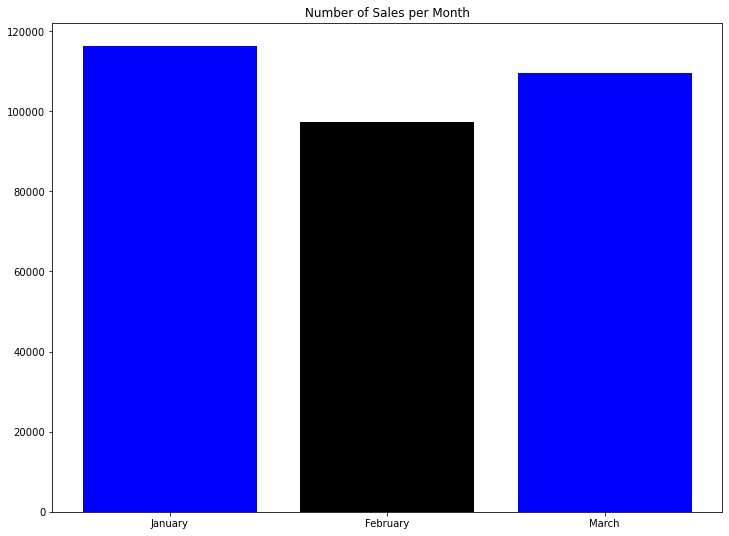

In [23]:
#Parameters for plotting 
sale=df.groupby('month').sum()['Total']
month=['January','February','March']
c=['b','k','b']
#Plot
plt.figure(figsize=(12,9))
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()
# print(sale)

# The supermarket performs well in January. It has a decrease in transactions in February and bounces back in March


# Quantity

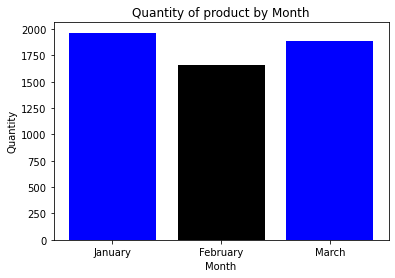

In [24]:
#Y-axis
quantity=df.groupby('month').sum()['Quantity']

#Plot
plt.title('Quantity of product by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.bar(month,quantity,color=c)
plt.show()

# The quantity graph follows a similar pattern to the Sale graph. We have a correlation between the number of products and the number of items sold.


# Rating

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


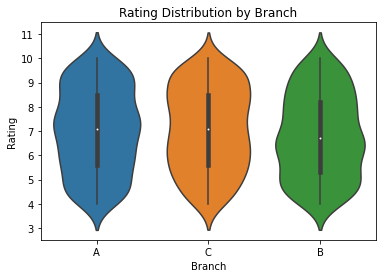

In [25]:
plt.title('Rating Distribution by Branch')
sns.violinplot('Branch','Rating',data=df);

- Branch A has received the most positive rating due to the tapered shape toward the middle between the values 6 to 9.
- Branch B has the most negative rating due to the tapered shape between the values 4 to 6.
- Branch C has almost equal positive and negative ratings between the value 4 to 6 and 8 to 10

# Payment

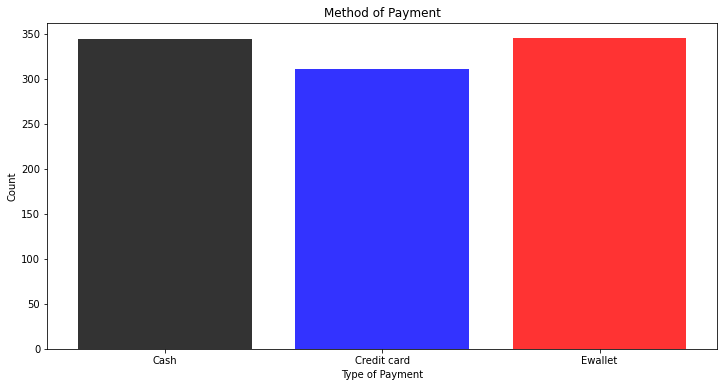

In [26]:
# Parameters for plotting
method=df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment,method,color=c,alpha=0.8)
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

* Cash is mainly used by customers across the branches.

# Hour

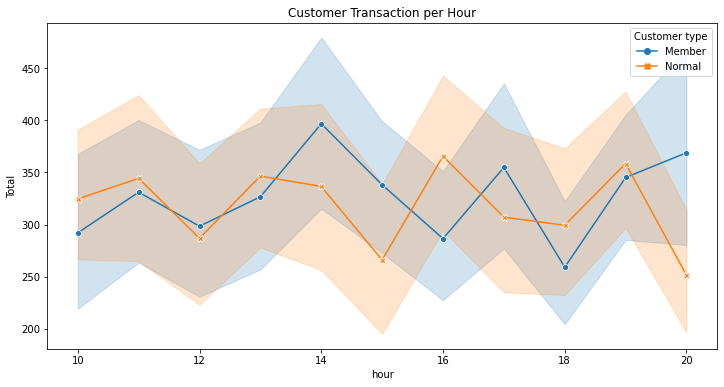

In [27]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=df,x='hour',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False); 

* The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm.
* Around 4 pm and 9 pm, the normal customers shop the most.


# Correlation

In [28]:
#Create a correlation matrix
corr_df=df.corr()

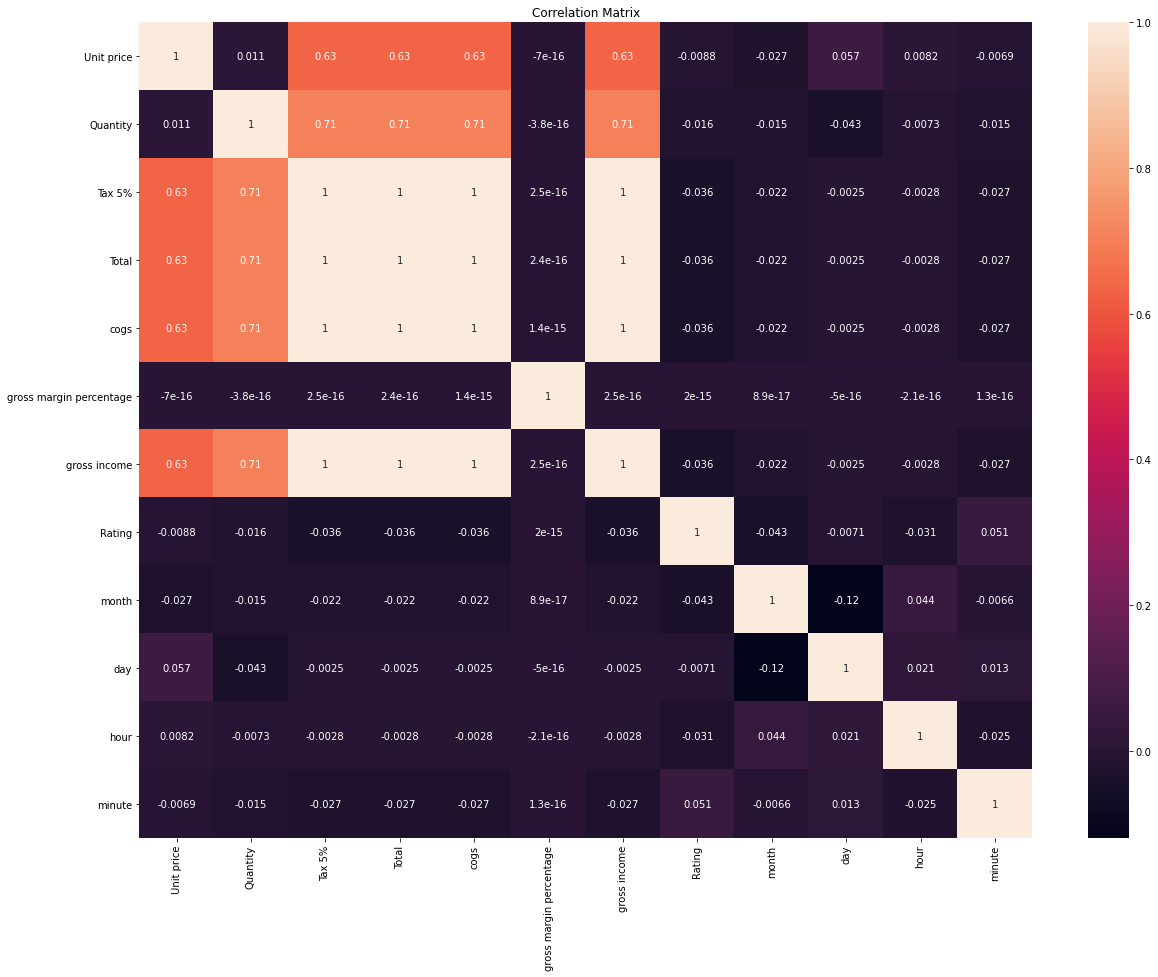

In [29]:
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

- The black bars represent the null values (gross margin percentage vs gross margin percentage)
- The purple represents almost no correlation between the column
- The orange block represents a high correlation between values. So taxes, Total, and cogs are highly correlated to quantity and unit price
- The pale block represents the perfect correlation between values of the same columns.


## After we get insight from the data, we could begin to ask some questions from those insights.



<h3 style="color: Black;">
    QUESTIONS
<br>
</h3>

   - What was the total number of sales? What branch has the highest number of sales?
    What type of product is sold the most?
    
   - What gender buy the most product? What gender buy more items in each category? what is the category?
    
   - How many people buy more than the average price in each category? Are they a member of the supermarket?
    
   - How many female members buy more than the average price in Food and beverages category?
    
   - What is the favorite method of payment of the members? of the normal customers?
    
   - What time should we display an advertisement to maximize the revenue?
    
    

# 1: What was the total number of sales? What branch has the highest number of sales?

In [30]:
sale_branch=df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.70649999994$


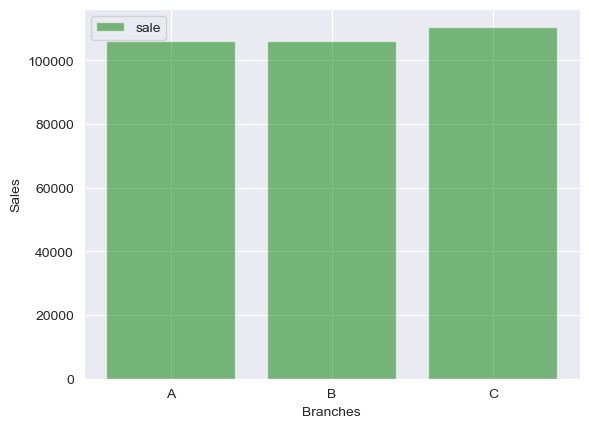

In [31]:
plt.style.use('default')
sns.set_style('darkgrid')
#Paramter for the x-axis
branches = [branch for branch, df in df.groupby('Branch')]
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'])
plt.show()

# 2: What type of product is sold the most?

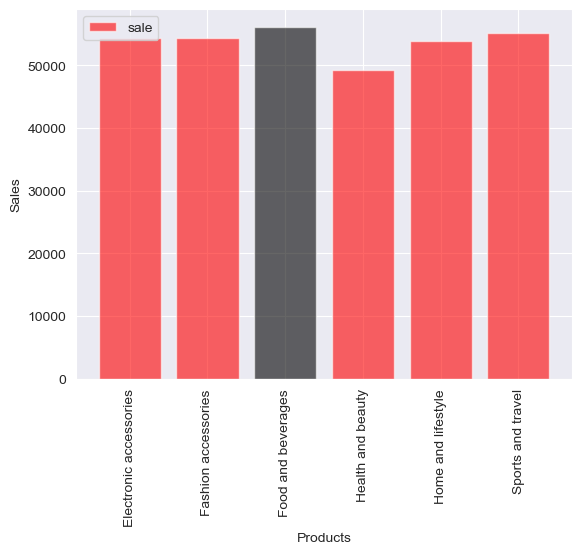

In [32]:
#Parameters
sale_product=df.groupby('Product line').sum()['Total']
products =[product for product, df in df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

# 3: What gender buy more items in each category? what is the category?

In [34]:
gender_market=df[['Gender','Total','Product line','Customer type']].sort_values('Total',ascending=False)

In [35]:
gender_market['male']=gender_market['Gender'][gender_market['Gender'] == 'Male']
gender_market['female']=gender_market['Gender'][gender_market.Gender.str.contains('Female')]
product_gender=gender_market.groupby('Product line').count()
product_gender
# male=product_gender['male']/product_gender['Total'].tolist()
gender_market.drop(columns=['male','female'],inplace=True)

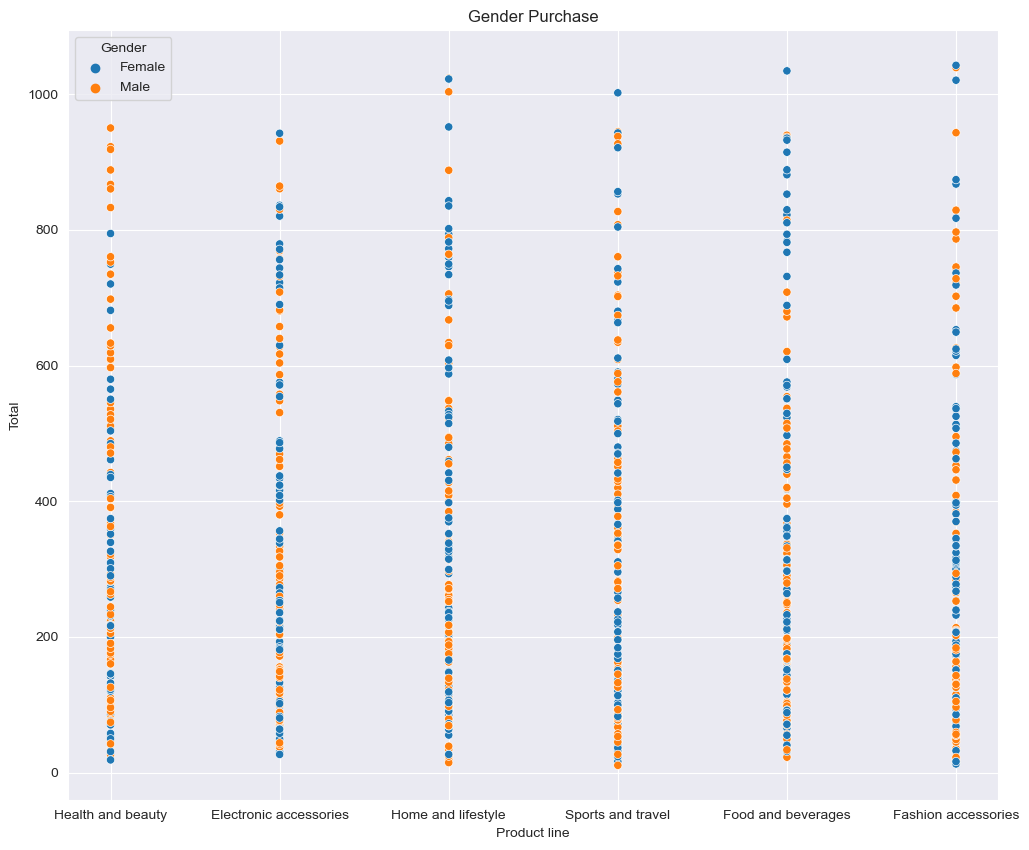

In [36]:
#Plot Gender purchase by product line
plt.figure(figsize=(12,10))
plt.title('Gender Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Gender',data=df);

- Men buy more products in 3 categories: Electronic accessories: 86 men, Health and beauty: 88 men, Home and lifestyle: 81 men
- Women buy more products in 3 categories: Fashion accessories: 96 women, Food and beverages: 90 women, Sports and travel: 88 women


# 4: How many people buy more than the average price in each category? Are they a member of the supermarket?

In [37]:
mean_sale=gender_market['Total'].mean()
product_line=gender_market['Product line'].unique()
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


In [38]:
people=[]
for product in product_line:
    p=gender_market[(gender_market['Total']>322.96) & (gender_market['Product line'] == product)].count()['Total']
    people.append(p)
num_people=np.sum(people)

In [40]:
print('Men buy more product in 3 categories: \nElectronic accessories: 86 men\nHealth and beauty: 88 men\nHome and lifestyle: 81 men\n')
print('Women buy more product in 3 categories: \nFashion accessories: 96 women\nFood and beverages: 90 women\nsports and travel: 88 women ')

Men buy more product in 3 categories: 
Electronic accessories: 86 men
Health and beauty: 88 men
Home and lifestyle: 81 men

Women buy more product in 3 categories: 
Fashion accessories: 96 women
Food and beverages: 90 women
sports and travel: 88 women 


# 4: How many people buy more than the average price in each category? Are they a member of the supermarket?



In [41]:
mean_sale=gender_market['Total'].mean()
product_line=gender_market['Product line'].unique()
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


In [42]:
people=[]
for product in product_line:
    p=gender_market[(gender_market['Total']>322.96) & (gender_market['Product line'] == product)].count()['Total']
    people.append(p)
num_people=np.sum(people)

In [43]:
#Result
print('The number of people who buy more average price by product line are:\n')
for pro, p in zip(product_line,people):
    print(f'{pro}: {p} people')
print(f'\nFor a total of {num_people} people')

The number of people who buy more average price by product line are:

Fashion accessories: 69 people
Food and beverages: 67 people
Home and lifestyle: 66 people
Sports and travel: 75 people
Health and beauty: 60 people
Electronic accessories: 67 people

For a total of 404 people


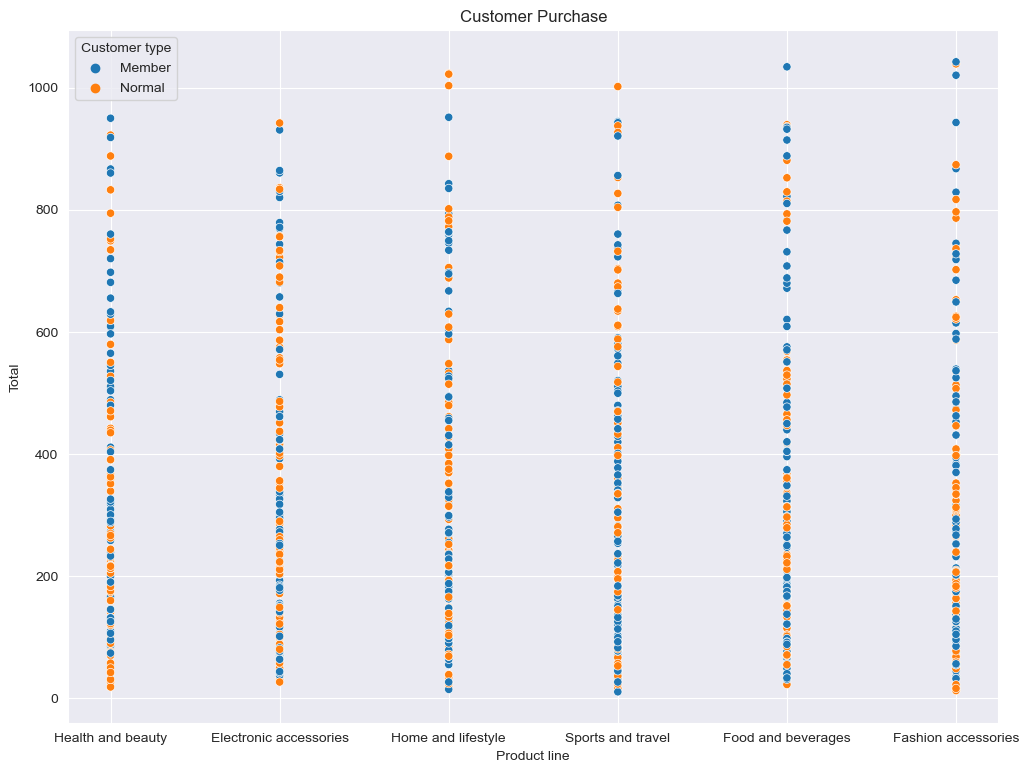

In [44]:
plt.figure(figsize=(12,9))
plt.title('Customer Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Customer type',data=df);

In [45]:
member=gender_market[(gender_market['Total']>322.96) & (gender_market['Customer type'] == 'Member')].count()['Total']
member_percentage =(member/num_people)*100
print('{:.2f}% that buy more than the average price are members'.format(member_percentage))

50.50% that buy more than the average price are members


# 5: How many female members buy more than the average price in Food and beverages category?

In [46]:
gender_market[(gender_market['Total']>322.96) & (gender_market['Gender'] == 'Female') & (gender_market['Product line'] == 'Food and beverages') & (gender_market['Customer type'] == 'Member')].count()['Total']

23

# 6: What is the favorite method of payment of the members? of the normal customers?

In [47]:
member_df=df[df['Customer type']=='Member']
Ncustomer_df=df[df['Customer type']=='Normal']

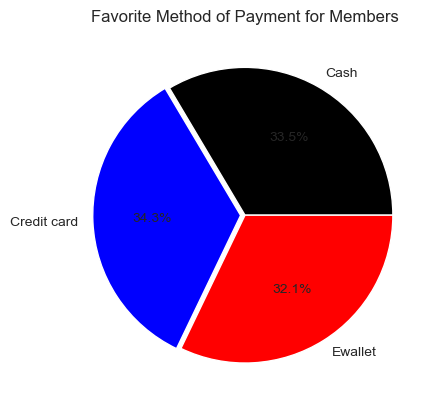

In [49]:
#Parameters for plotting
method=member_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot the bar figure 

plt.pie(method,colors=c,labels=payment,explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Members')
plt.show()

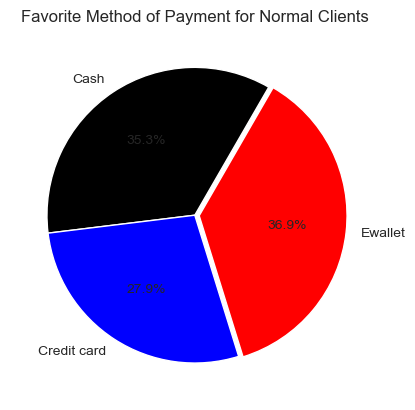

In [50]:
#Parameters for plotting
method=Ncustomer_df.groupby('Payment').count()['Customer type']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
#Plot 
plt.pie(method,colors=c,labels=payment,startangle=60,explode=[0,0,0.03],autopct='%1.1f%%')
plt.title('Favorite Method of Payment for Normal Clients')
plt.show()

# 6: What time should we display an advertisement to maximize the revenue?

In [52]:
#Parameter for plotting
sale=df.groupby('hour').sum()['Total']
hours=[hour for hour, df in df.groupby('hour')]

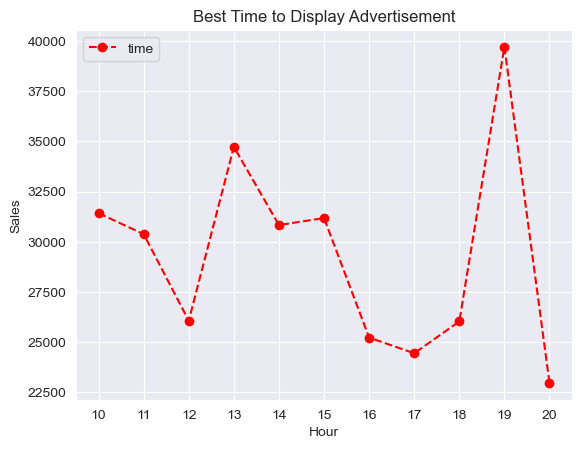

In [53]:
#Plot
plt.plot(hours,sale,'o--r')
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Best Time to Display Advertisement')
plt.legend(['time'])
plt.show()

In [54]:
print('We should display advertisement to the customer before 13h and 19h')
# df.groupby('hour').sum()['Total']

We should display advertisement to the customer before 13h and 19h


# INFERENCES AND CONCLUSION


## We have drawn many inferences from the dataframe. Here is a summary of a few of them:


## * Branch C that is in Naypyitaw has the highest number of transaction and sales
## * February has the lowest number of sales and January account for the most sales
## * The quantity of product is well distributed across the bord
## * Food and beverage category produces the most amount of sale
## * Men purchase more products in 3 categories : Electronics, health and beauty, home and lifestyle.
## * Women purchase more products in 3 categories: Fashion, Food and beverages, and travel
## * 404 people out 1000 buy more the average price. Sport and travel category has the most (75)people who buy more than the average price
## * Cash is the favorite method of payment accross costumers. The member used a credit card and cash to complete transaction. * The normal costumer prefer to use Ewallet and cash
## * The favorite time to display advertisement is before 13h and 19h